In [1]:
random_folders = [
    '../output/it.feio.android.omninotes.alpha/2025-04-20T01.56.35',
    '../output/it.feio.android.omninotes.alpha/2025-04-20T03.48.51',
    '../output/it.feio.android.omninotes.alpha/2025-04-20T05.44.00'
]

llm_folders = [
    '../output/it.feio.android.omninotes.alpha/2025-04-24T16.53.20',
    '../output/it.feio.android.omninotes.alpha/2025-04-24T19.25.05'
]

new_folders = [
    '../output/it.feio.android.omninotes.alpha/2025-05-04T23.26.37',
    '../output/it.feio.android.omninotes.alpha/2025-05-05T00.59.57',
    '../output/it.feio.android.omninotes.alpha/2025-05-05T06.51.20',
    '../output/it.feio.android.omninotes.alpha/2025-05-05T10.12.50',
]

random_files = [f + '/coverage/coverage.csv' for f in random_folders]
llm_files = [f + '/coverage/coverage.csv' for f in llm_folders]
new_files = [f + '/coverage/coverage.csv' for f in new_folders]

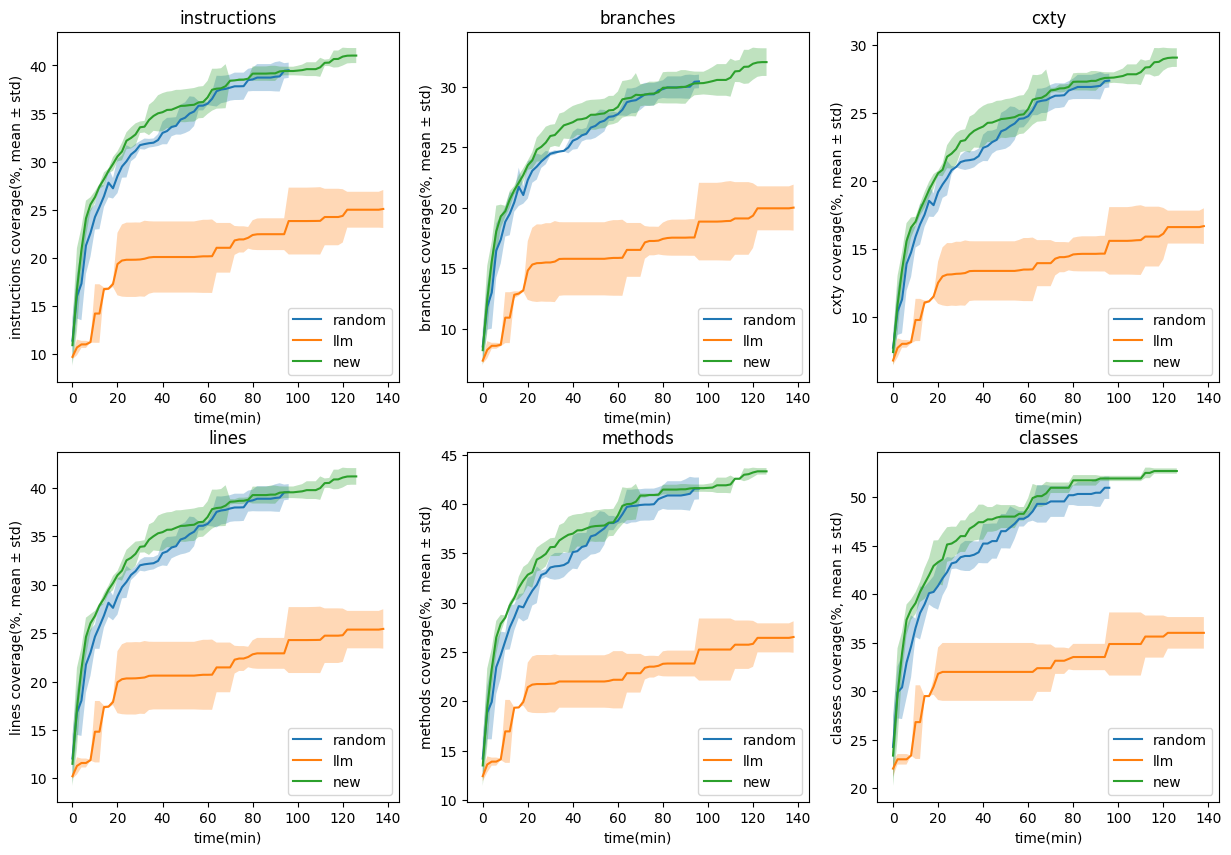

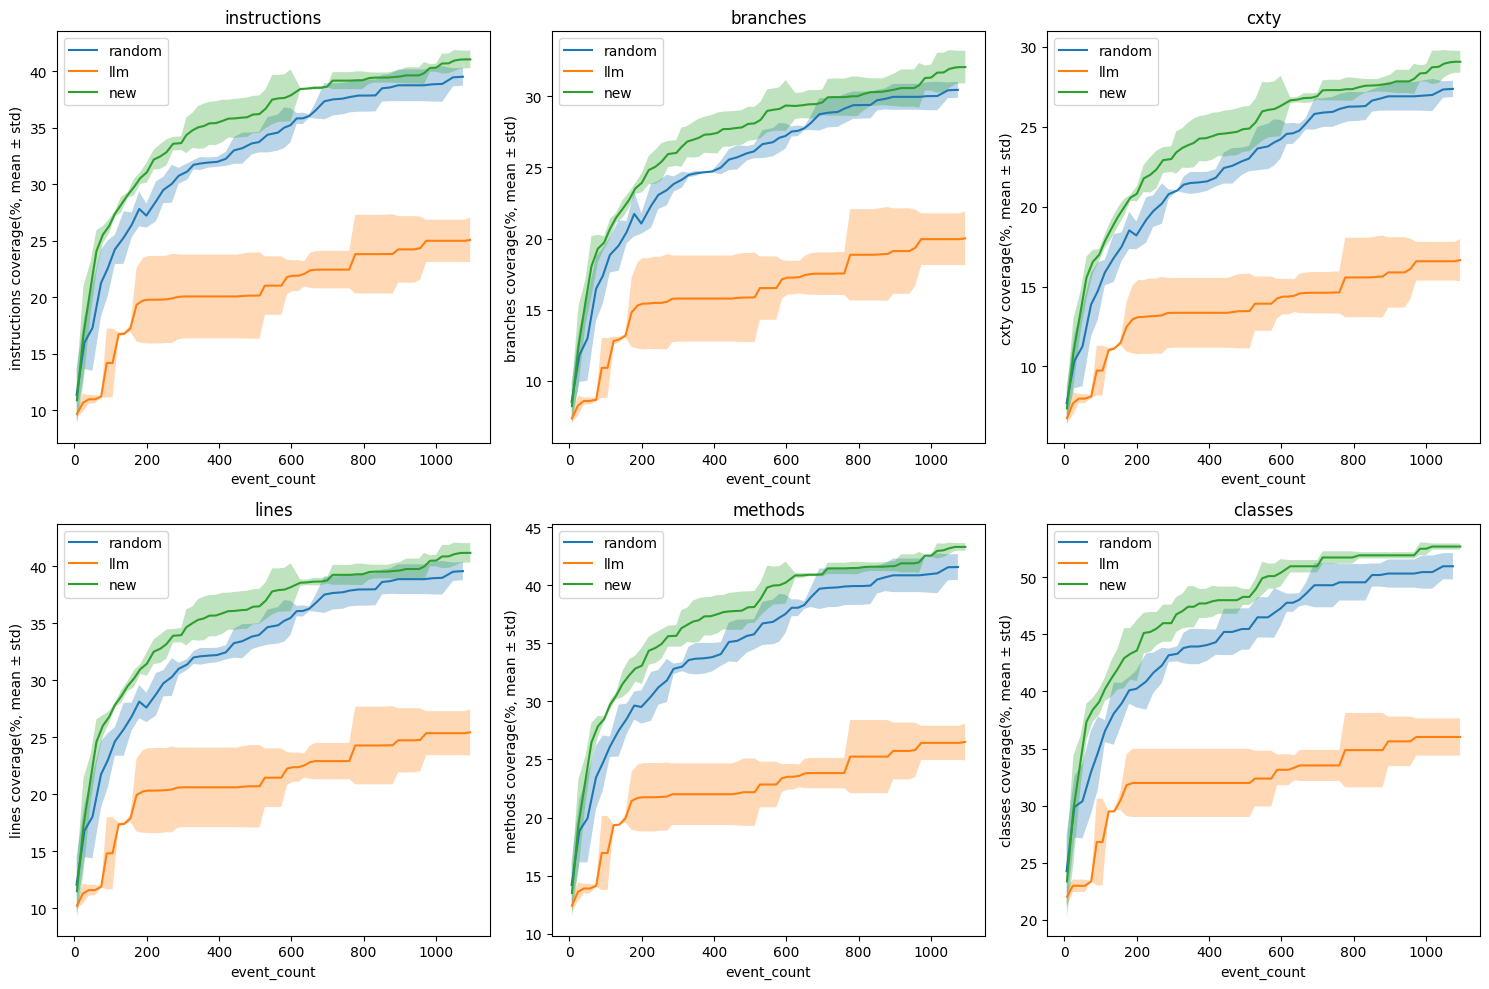

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

fig_time, axs_time = plt.subplots(2, 3, figsize=(15, 10))
fig_event, axs_event = plt.subplots(2, 3, figsize=(15, 10))

def draw(files: list[str], name: str):
    df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)
    
    df_grouped = df.groupby('index').agg({ 
        'instructions': ['mean', 'std'],
        'branches': ['mean', 'std'],
        'cxty': ['mean', 'std'],
        'lines': ['mean', 'std'],
        'methods': ['mean', 'std'],
        'classes': ['mean', 'std'],
        'event_count': 'mean'
    }).reset_index()
    
    df_grouped.columns = ['index'] + [f'{col}_{stat}' for col in ['instructions', 'branches', 'cxty', 'lines', 'methods', 'classes'] for stat in ['mean', 'std']] + ['event_count']
    
    df_grouped = df_grouped[df_grouped['event_count'] <= 1100]
        
    cols = ['instructions', 'branches', 'cxty', 'lines', 'methods', 'classes']

    for i, col in enumerate(cols):
        ax = axs_time[i // 3, i % 3]
        y = df_grouped[f'{col}_mean']
        yerr = df_grouped[f'{col}_std']
        x = df_grouped['index']
        ax.plot(x * 2, y, label=name)
        ax.fill_between(x * 2, y - yerr, y + yerr, alpha=0.3)
        ax.set_title(col)
        ax.set_xlabel('time(min)')
        ax.set_ylabel(f'{col} coverage(%, mean ± std)')
        ax.legend()
        
    df_grouped = df_grouped.sort_values(by='event_count')

    for i, col in enumerate(cols):
        ax = axs_event[i // 3, i % 3]
        y = df_grouped[f'{col}_mean']
        yerr = df_grouped[f'{col}_std']
        x = df_grouped['event_count']
        ax.plot(x, y, label=name)
        ax.fill_between(x, y - yerr, y + yerr, alpha=0.3)
        ax.set_title(col)
        ax.set_xlabel('event_count')
        ax.set_ylabel(f'{col} coverage(%, mean ± std)')
        ax.legend()

    plt.tight_layout()

    
draw(random_files, 'random')
draw(llm_files, 'llm')
draw(new_files, 'new')

plt.show()

In [3]:
import os

name = random_folders[0].strip('/').split('/')[-2]
save_dir = f'output/{name}'

os.makedirs(save_dir, exist_ok=True)

fig_time.savefig(f'{save_dir}/coverage_time.png')
fig_event.savefig(f'{save_dir}/coverage_event.png')

fig_time.savefig(f'{save_dir}/coverage_time.pdf')
fig_event.savefig(f'{save_dir}/coverage_event.pdf')